# <h1 style="color:red;font-size:40px;"><center>EXPLORATORY DATA ANALYSIS ON US ACCIDENTS DATASET</center></h1> 
    

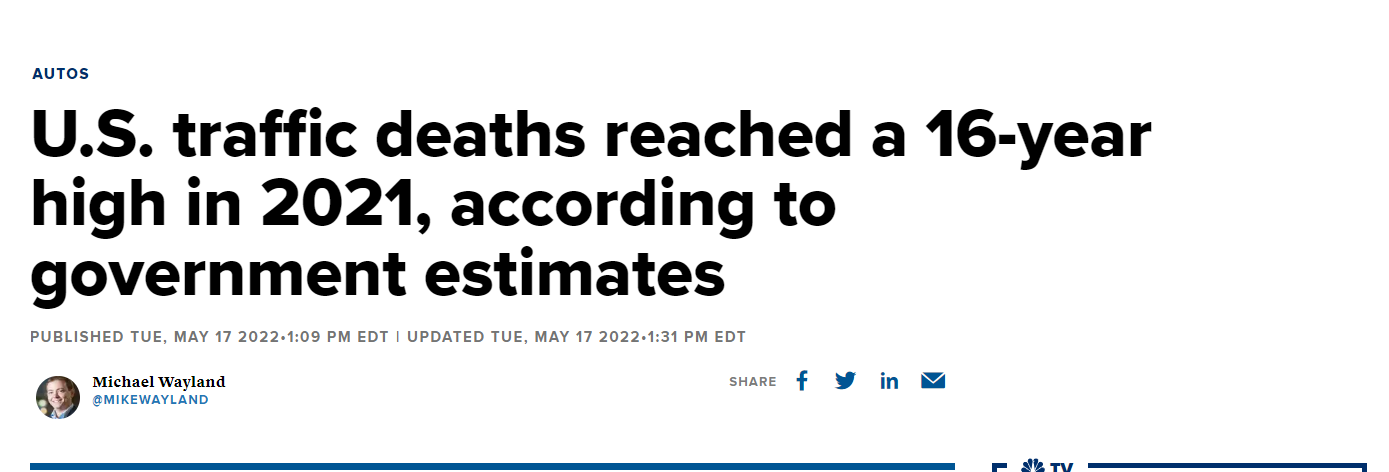

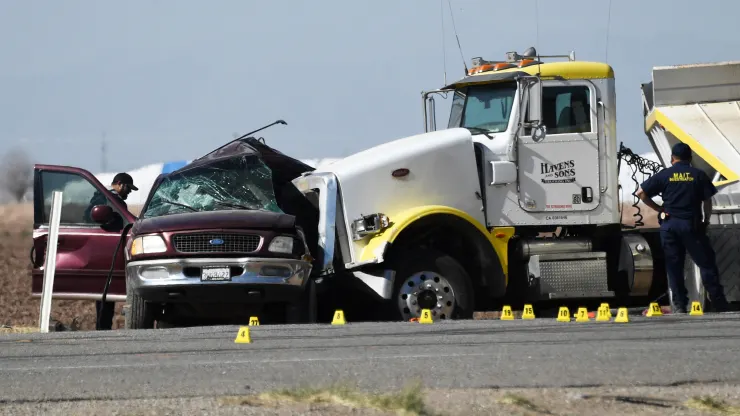

## Table of Contents


1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading dataset](#section3)<br>
4. [Description of the Dataset](#section4)<br>
5. [Exploratory Data Analysis](#section5)<br>
- 5.1 [**City vs Number of Accidents**](#section51)<br>
    - 5.1.1 [Top 20 Cities by Number of Accidents](#section511)<br>
    - 5.1.2 [Distribution of Cities by Number of Accidents](#section512)<br>            
    - 5.1.3 [High Accident and Low Accident Cities](#section513)<br>
    - 5.1.4 [Distribution of Cities among the High Accident Cities](#section514)<br>
- 5.2 [**States vs Number of Accidents**](#section52)<br>
    - 5.2.1 [Top 20 States by Number of Accidents](#section521)<br>
    - 5.2.2 [Impact of Population of States  on Number of Accidents](#section522)<br>
    - 5.2.3 [Population of the State vs Number of Accidents](#section523)<br>
- 5.3 [**Trend of Accidents in Daily,Weekly,Monthly and Yearly Timeframe**](#section53)<br>
    - 5.3.1 [Accident Trend  Daily on Weekdays](#section531)<br>
    - 5.3.2 [Accident Trend  Daily on Weekends](#section532)<br>
    - 5.3.3 [Weekly Accident Trend](#section533)<br>
    - 5.3.4 [Monthly Accident Trend](#section534)<br>
    - 5.3.5 [Yearly Accident Trend](#section535)<br>
- 5.4 [**Distribution of Accidents across US**](#section54)<br>
- 5.5 [**Impact of Weather on Accidents**](#section55)<br>
    - 5.5.1 [Top 10 weather condtions which causes most accidents](#section551)<br>
    - 5.5.2 [Weather Condtion vs Severity of Accidents](#section552)<br>
- 5.6 [Trend of Severity of Accidents over the 5 year timeframe](#section56)<br>
6. [Summary](#section6)<br>
7. [Actionable Insights](#section7)<br>
8. [Future Scope](#section8)<br>

<a id=section1)></a>
## 1.Problem Statement

Every year the number of accidents in US is increasing and in 2021 it has been recorded a 16 year high. What are the attributes which are contributing to these accidents? Letzz find it out through **Exploratory Data Analysis** of the US accidents dataset taken from Kaggle.

<b>EDA</b> helps in:

    - Identifying Trends and Patterns in data
    - Establishing relationships present in the data
    - Facting checking of assumptions and opinions
    - Identification or errors in data

<a id=section2)></a>
## 2. Importing Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
import requests
from bs4 import BeautifulSoup


warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth', None)
sb.set(style='white',color_codes=True)

In [3]:
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

<a id=section3)></a>
## 3. Loading dataset

In [4]:
dataset=pd.read_csv(r"C:\Users\HAI\Desktop\DAP\us-accidents\US_Accidents_Dec21_updated.csv")

In [5]:
dataset.head(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentangy Riv Rd/Exit 22 - Accident.,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


<a id=section4)></a>

## 4. Description of the Dataset

|<center>Column Name</center>|<center>Short  Description</center>|
|----------------------------------|-----------------------------------------------------------------------------------|
|<center>ID</center>|<center>Unique identifier of the accident record</center>|
|<center>Severity</center>|<center>Range(1,4), 1 indicates the least impact on traffic and 4 indicates a significant impact on traffic</center>|
|<center>Start_Time</center>|<center>Start time of the accident in local time zone</center>|
|<center>End_Time</center>|<center>Time when the impact of accident on traffic flow was dismissed in local time zone</center>|
|<center>Start_Lat</center>|<center>Latitude of the start point</center>|
|<center>Start_Lng</center>|<center>Longitude of the start point</center>|
|<center>End_Lat</center>|<center>Latitude of the end point</center>|
|<center>End_Lng</center>|<center>Longitude of the endpoint</center>|
|<center>Distance(mi)</center>|<center>The length of the road extent affected by the accident</center>|
|<center>Description</center>|<center>Human provided description of the accident</center>|
|<center>Number</center>|<center>Street number in address field</center>|
|<center>Street</center>|<center>Street name in address field</center>|
|<center>Side</center>|<center>Shows the relative side of the street (Right/Left) in address field</center>|
|<center>City</center>|<center>City in address field</center>|
|<center>County</center>|<center>County in address field</center>|
|<center>State</center>|<center>State in address field</center>|
|<center>Zipcode</center>|<center>Zipcode in address field</center>|
|<center>Country</center>|<center>Country in address field</center>|
|<center>Timezone</center>|<center>Timezone based on the location of the accident</center>|
|<center>Airport_Code</center>|<center>Denotes an airport-based weather station which is the closest one to location of the accident</center>|
|<center>Weather_Timestamp</center>|<center>Time-stamp of weather observation record (in local time)</center>|
|<center>Temperature(F)</center>|<center>Temperature (in Fahrenheit)</center>|
|<center>Wind_Chill(F)</center>|<center>Wind chill (in Fahrenheit)</center>|
|<center>Humidity(%)</center>|<center>Humidity (in percentage)</center>|
|<center>Pressure(in)</center>|<center>Air pressure (in inches</center>|
|<center>Visibility(mi)</center>|<center>Shows visibility (in miles)</center>|
|<center>Wind_Direction</center>|<center>Shows wind direction</center>|
|<center>Wind_Speed(mph)</center>|<center>Wind speed (in miles per hour)</center>|
|<center>Precipitation(in)</center>|<center>Precipitation amount in inches</center>
|<center>Weather_Condition</center>|<center>Weather condition (rain, snow, thunderstorm, fog, etc</center>|
|<center>Amenity</center>|<center>A POI annotation which indicates presence of amenity in a nearby location</center>|
|<center>Bump</center>|<center>A POI annotation which indicates presence of speed bump or hump in a nearby location</center>|
|<center>Crossing</center>|<center>A POI annotation which indicates presence of crossing in a nearby location</center>|
|<center>Give_Way</center>|<center>A POI annotation which indicates presence of give_way in a nearby location</center>|
|<center>Junction</center>|<center>A POI annotation which indicates presence of junction in a nearby location</center>|
|<center>No_Exit</center>|<center>A POI annotation which indicates presence of no_exit in a nearby location</center>|
|<center>Railway|<center>A POI annotation which indicates presence of railway in a nearby location</center>|
|<center>Roundabout|<center>A POI annotation which indicates presence of roundabout in a nearby location</center>|
|<center>Station|<center>A POI annotation which indicates presence of station in a nearby location</center>|
|<center>Stop</center>|<center>A POI annotation which indicates presence of stop in a nearby location</center>|
|<center>Traffic_Calming</center>|<center>A POI annotation which indicates presence of traffic_calming in a nearby location</center>|
|<center>Traffic_Signal</center>|<center>A POI annotation which indicates presence of traffic_signal in a nearby location</center>|
|<center>Turning_Loop</center>|<center>A POI annotation which indicates presence of turning_loop in a nearby location</center>|
|<center>Sunrise_Sunset</center>|<center>Period of day (i.e. day or night) based on sunrise/sunset</center>|
|<center>Civil_Twilight</center>|<center>Period of day (i.e. day or night) based on civil twilight</center>|
|<center>Nautical_Twilight</center>|<center>Period of day (i.e. day or night) based on nautical twilight</center>|
|<center>Astronomical_Twilight</center>|<center>Period of day (i.e. day or night) based on astronomical twilight</center>|


In [6]:
dataset.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [7]:
dataset.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     2845342 non-null  object 
 1   Severity               2845342 non-null  int64  
 2   Start_Time             2845342 non-null  object 
 3   End_Time               2845342 non-null  object 
 4   Start_Lat              2845342 non-null  float64
 5   Start_Lng              2845342 non-null  float64
 6   End_Lat                2845342 non-null  float64
 7   End_Lng                2845342 non-null  float64
 8   Distance(mi)           2845342 non-null  float64
 9   Description            2845342 non-null  object 
 10  Number                 1101431 non-null  float64
 11  Street                 2845340 non-null  object 
 12  Side                   2845342 non-null  object 
 13  City                   2845205 non-null  object 
 14  County            

### <b>Columns of Interest</b>

Also we are interested in analysing only selective  columns of the dataset. Hence 
we drop remaining columns for convenience

In [8]:
df=dataset.drop(dataset.iloc[:,30:],axis=1)
df.drop(['Pressure(in)','Precipitation(in)','Wind_Speed(mph)','Wind_Chill(F)','Humidity(%)','Number',\
         'Description','Visibility(mi)','Wind_Direction','Airport_Code','Weather_Timestamp','County',\
         'Zipcode','Distance(mi)','Description','Street','Side','End_Lat','End_Lng'],axis=1,inplace=True)
df.head(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,State,Country,Timezone,Temperature(F),Weather_Condition
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,Dublin,OH,US,US/Eastern,42.1,Light Rain
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,Dayton,OH,US,US/Eastern,36.9,Light Rain
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,Cincinnati,OH,US,US/Eastern,36.0,Overcast
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,Akron,OH,US,US/Eastern,39.0,Overcast
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,Cincinnati,OH,US,US/Eastern,37.0,Light Rain


<AxesSubplot:title={'center':'Percentage of missing values per column'}>

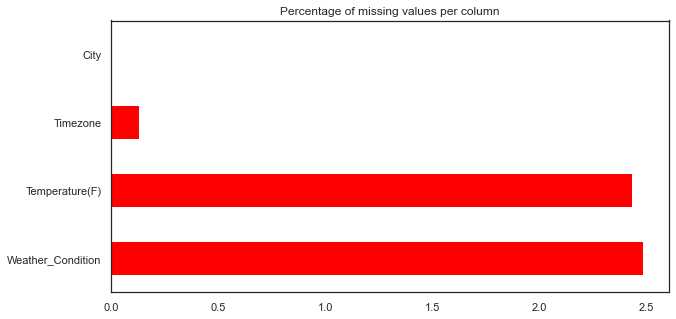

In [9]:
#To find the percentage of empty cells in columns 

missing_values_percent=df.isna().sum()/len(dataset)/0.01
mvp=(missing_values_percent[missing_values_percent>0]).sort_values(ascending=False)

plt.figure(figsize=(10,5))
mvp.plot(kind='barh',use_index=True,title='Percentage of missing values per column',color='red')

The maximum number of data missing in a column is 2.5%. 

Still we have **97.5%** which is about **2.77** million rows of data from which we can obtain actionable insights.

<a id=section5)></a>
# 5.Exploratory Data Analysis

We dive into exploring the data based on the columns filtered and finding outthe relationships between them

<a id=section51)></a>
## 5.1 City vs Number of Accidents

**Do few select cities contribute to more number of accidents?**

In [10]:
# To determine the unique cities present in  the dataset

unique_cities=df.City.unique()
len(unique_cities)

11682

In [11]:
#Numbert of Accidents in each city(2016-2021)
df.City.value_counts()

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

**Rank of New York by Number of Accidents**

In [12]:
NY=df.groupby('City').agg({'ID':[('Number_of_Accidents','count')]})
NY=NY.droplevel(0,axis=1)
NY=NY.sort_values(by=('Number_of_Accidents'),ascending=False).reset_index()
NY[NY['City']=='New York']

,City,Number_of_Accidents
50,New York,7068


<a id=section511)></a>
###  **5.1.1 Top 20 Cities by Number of Accidents**

Text(0, 0.5, 'City')

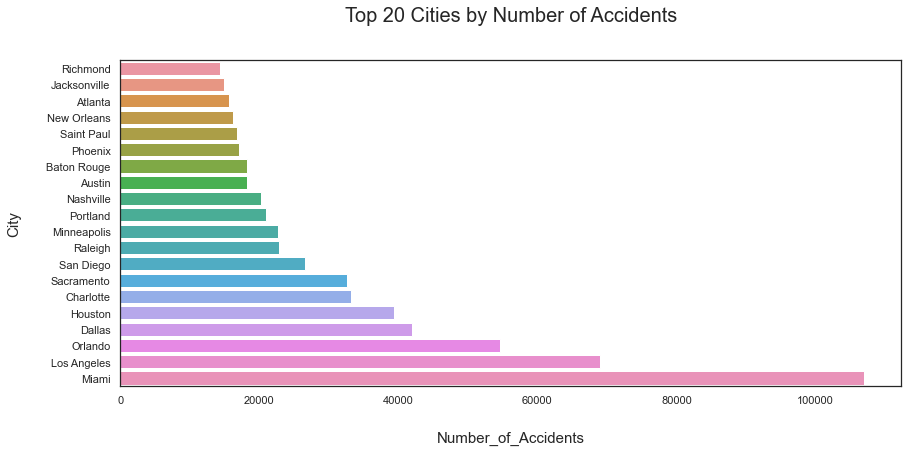

In [13]:

plt.figure(figsize = (14,6))
data_city=NY[:20].sort_values(by='Number_of_Accidents',ascending=True)
plot_bar = sb.barplot(data =data_city , x='Number_of_Accidents', y='City')     
plot_bar.set_title("Top 20 Cities by Number of Accidents", y =1.1,fontsize=20)
plot_bar.set_xlabel('Number_of_Accidents',labelpad=25,fontsize=15)
plot_bar.set_ylabel('City',labelpad=25,fontsize=15)

In [14]:
Top3contri=NY.sort_values(by='Number_of_Accidents',ascending=False).head(3)
Top3contri['% contribution']=round(Top3contri['Number_of_Accidents']/NY['Number_of_Accidents'].sum()/0.01,2)
Top3contri

,City,Number_of_Accidents,% contribution
0,Miami,106966,3.76
1,Los Angeles,68956,2.42
2,Orlando,54691,1.92


- **New York** being the largest city by Population ranks **51st** in rank by number of accidents.
- **Miami** being 44th most populous city **tops** the chart in number of accidents contributing to total of **3.76%** if the total accidents.

<a id=section512)></a>
### 5.1.2 Distribution of Cities by Number of Accidents

Text(0.5, 0, 'Number of Accidents')

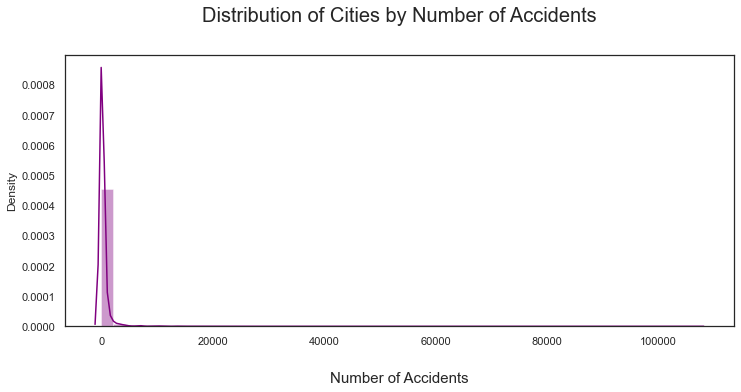

In [15]:
#We ignore cities having less than 10 accidents during thge period from 2016 to 2021 

plt.figure(figsize = (12,5))
acc10=NY[NY['Number_of_Accidents']>10]
sb.distplot(acc10['Number_of_Accidents'],color='purple')
plt.title("Distribution of Cities by Number of Accidents", y =1.1,fontsize=20)
plt.xlabel('Number of Accidents',labelpad=25,fontsize=15)

- Most of the cities are densely spread in the 10 to 10000 accidents range.
- We define two categories in cities namely 
        - High Accident cities where Accident>1000
        - Low Accident cities where Accident<=1000

In [16]:
#High Accident cities

high_accident_cities=acc10[acc10.Number_of_Accidents>1000]
low_accident_cities=acc10[acc10.Number_of_Accidents<=1000]

<a id=section513)></a>
### 5.1.3 High Accident and Low Accident Cities

**Number of High Accident and Low Accident Cities**

In [17]:

con=pd.DataFrame(acc10['Number_of_Accidents'])

con['High_Low']=np.where(con.Number_of_Accidents>1000,"High_Accident_Cities","Low_Accident_Cities")

count=con.groupby(['High_Low']).count().reset_index().rename(columns={'High_Low':"Type of CITY",\
                                                                        'Number_of_Accidents':"Count_of_Cities"})
count

,Type of CITY,Count_of_Cities
0,High_Accident_Cities,494
1,Low_Accident_Cities,6559


**High Accident and Low Accident Cities Percentage**

Text(0.5, 1.0, 'High and Low Accident Cities')

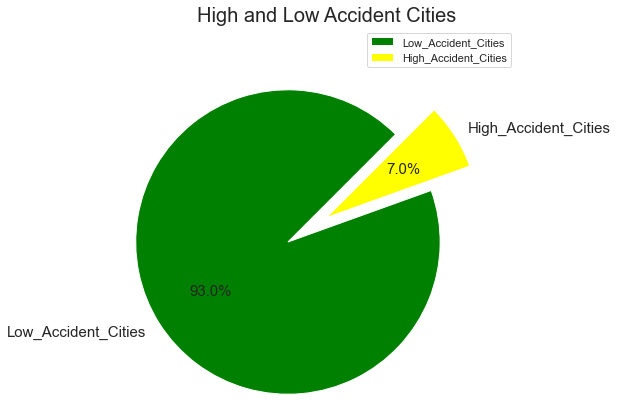

In [18]:

colors=["green","yellow"]

con.High_Low.value_counts().plot(kind='pie',explode=[0.3,0],colors=colors,startangle=45,fontsize=15,autopct='%1.1f%%',\
                                 figsize=(7,7),ylabel="",legend=True)
plt.title("High and Low Accident Cities",fontsize=20,loc='center')                            

**Number of Accidents in high and low accident cities**

In [19]:
display(con.groupby(['High_Low']).sum().reset_index().rename(columns={'High_Low':"Type of CITY"}))

,Type of CITY,Number_of_Accidents
0,High_Accident_Cities,1888289
1,Low_Accident_Cities,939005


**Contribution of High and Low Accident Cities to Total Accidents**

Text(0.5, 1.0, 'Contribution of High and Low Accident Cities to Total Accidents')

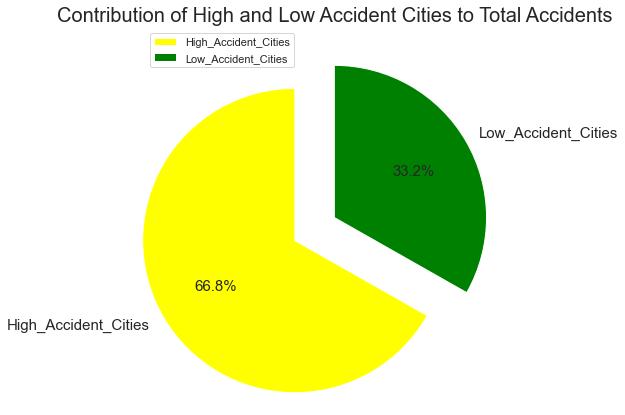

In [20]:

colors=["yellow","green"]
con.groupby(['High_Low']).sum().plot(kind='pie',explode=[0.3,0],colors=colors,startangle=90,fontsize=15,autopct='%1.1f%%',\
                                 figsize=(7,7),ylabel="",y='Number_of_Accidents')
plt.title("Contribution of High and Low Accident Cities to Total Accidents",fontsize=20,loc='center')

- **High Accident cities** which is **7%** of the total number of cities contribute to **66.8%** of the total accidents which is 2/3rd of the total accidents.


- Whereas **Low Accident cities** eventhough contributes of **93%** of the total number of cities, contribute only **33.2%** of the total accidents.

<a id=section514)></a>
### 5.1.4 **Distribution of Cities among the High Accident Cities**

Text(0, 0.5, 'Number of High Accident Cities')

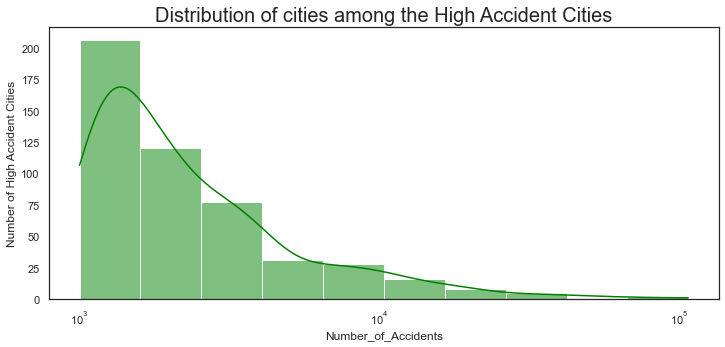

In [21]:
plt.figure(figsize = (12,5))
sb.histplot(high_accident_cities['Number_of_Accidents'],log_scale=True,bins=10,kde=True,color='green')
plt.title("Distribution of cities among the High Accident Cities",fontsize=20,loc='center')
plt.ylabel("Number of High Accident Cities")

**Distribution of Cities among the Low Accident Cities**

Text(0, 0.5, 'Number of High Accident Cities')

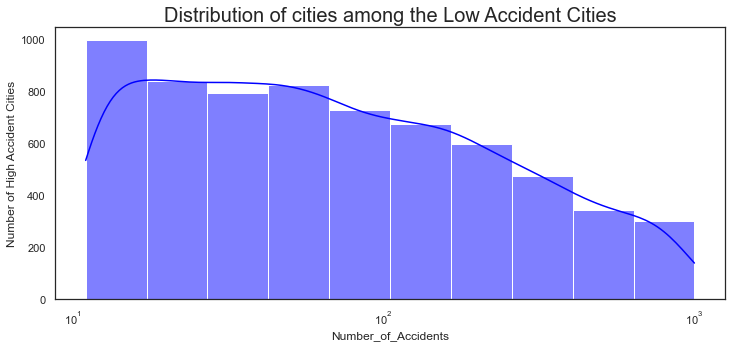

In [22]:
plt.figure(figsize = (12,5))
sb.histplot(low_accident_cities['Number_of_Accidents'],log_scale=True,bins=10,kde=True,color='blue')
plt.title("Distribution of cities among the Low Accident Cities",fontsize=20,loc='center')
plt.ylabel("Number of High Accident Cities")

- There is **declining trend** in the number of cities in both high accident cities towards the right end of the spectrum. 
- In low acccident cities majority of the cities have accidents less than 100
- In high accident cities majority of the cities have less thanaccidents 10000 accidents

<a id=section52)></a>
## 5.2 States vs Number of Accidents

- **Do a limited number of states have a major impact on the accidents?**
- **Which states has the highest number of accidents?**
- **Does the State population have a relationship with the number of accidents that occured?**

- There are a total of **50** states along with **District of Columbia(DC)** which acts as an independent district in US

In [23]:
#Statewise Accident count

state=df.groupby(['State']).count()['ID'].reset_index().rename(columns={'ID':'Number of Accidents'})
state

,State,Number of Accidents
0,AL,19322
1,AR,10935
2,AZ,56504
3,CA,795868
4,CO,25340
5,CT,29762
6,DC,9133
7,DE,4842
8,FL,401388
9,GA,40086


- There are only 49 entries in the dataset. 
- Hence we find out the states which are missing by importing the state data from the web.

In [24]:
#Dataframe to bring in the State names

state_url='https://abbreviations.yourdictionary.com/articles/state-abbrev.html'
page=requests.get(state_url)
page

<Response [200]>

In [25]:
#Web scraping to extract the states data from the Web

soup=BeautifulSoup(page.text,'html.parser')
abb=soup.find('table')

di=dict()
l1=[]
l2=[]
for body in abb.find_all('tbody'):
    rows=body.find_all('tr')
    for row in rows:
        name=l1.append(row.find_all('td')[0].text)
        code=l2.append(row.find_all('td')[1].text)
l=[l1,l2]       
statename=pd.DataFrame({x[0]:x[1:] for x in l})
statename=statename.rename(columns={'USPS Abbreviation':'State'})
statename.columns

Index(['State Name', 'State'], dtype='object')

In [26]:
#Merging the dataset and the statedata

inter=pd.merge(state,statename,how='outer')
inter=inter.replace(np.NaN,{'State Name':'District of Columbia'})
inter

,State,Number of Accidents,State Name
0,AL,19322.0,Alabama
1,AR,10935.0,Arkansas
2,AZ,56504.0,Arizona
3,CA,795868.0,California
4,CO,25340.0,Colorado
5,CT,29762.0,Connecticut
6,DC,9133.0,District of Columbia
7,DE,4842.0,Delaware
8,FL,401388.0,Florida
9,GA,40086.0,Georgia


- There is **no data for Alaska and Hawaii** in the Data. Hence we drop those two rows.

<a id=section521)></a>
### 5.2.1 **Top 20 States by Number of Accidents**

Text(0, 0.5, 'State')

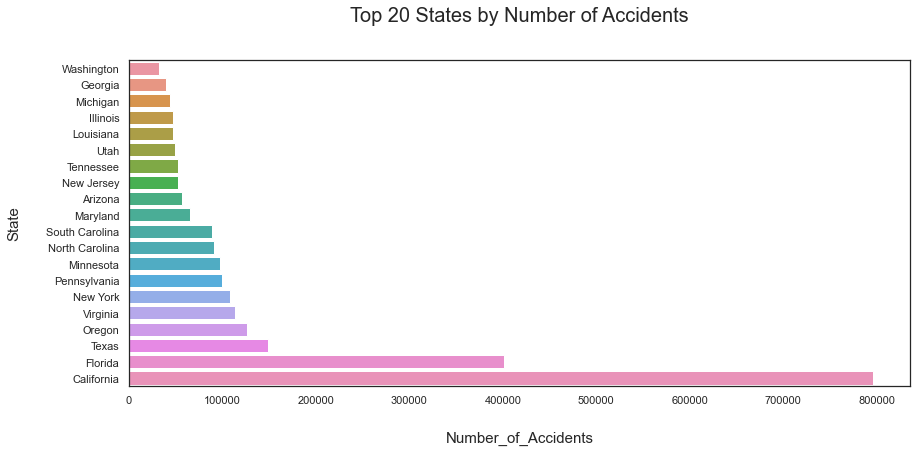

In [27]:

plt.figure(figsize = (14,6))
data_state=inter.sort_values(by='Number of Accidents',ascending=False)[:20].sort_values(by='Number of Accidents',ascending=True)
plot_bar = sb.barplot(data =data_state , x='Number of Accidents', y='State Name')     
plot_bar.set_title("Top 20 States by Number of Accidents", y =1.1,fontsize=20)
plot_bar.set_xlabel('Number_of_Accidents',labelpad=25,fontsize=15)
plot_bar.set_ylabel('State',labelpad=25,fontsize=15)

In [28]:
inter=inter.dropna(how='any')

**State with maximum number of Accidents**

In [29]:
inter[inter['Number of Accidents']==max(inter['Number of Accidents'])]

,State,Number of Accidents,State Name
3,CA,795868.0,California


In [30]:
maxstate=inter.sort_values(by='Number of Accidents',ascending=False,ignore_index=True).head(3)
maxstate['% contribution']=round(maxstate['Number of Accidents']/inter['Number of Accidents'].sum()/0.01,2)
maxstate

,State,Number of Accidents,State Name,% contribution
0,CA,795868.0,California,27.97
1,FL,401388.0,Florida,14.11
2,TX,149037.0,Texas,5.24


**State with minimum number of Accidents**

In [31]:
inter[inter['Number of Accidents']==min(inter['Number of Accidents'])]

,State,Number of Accidents,State Name
39,SD,201.0,South Dakota


- **Californa and Florida** are the two major states which cause the **most number of accidents**.
- **California** has experienced the **most** number of accidents over the past five years and **South dakota** the **least**

<a id=section522)></a>
### 5.2.2 Impact of Population of States  on Number of Accidents

In [32]:
#Dataframe to bring in the population data

url2='https://www.findeasy.in/top-us-states-by-population-statewise-population/'
page2=requests.get(url2)
page2

<Response [200]>

In [33]:
#Web scraping to extract the state population data from the Web

soup2=BeautifulSoup(page2.text,"html.parser")
pop=soup2.find('table')


di2=dict()
l3=[]
l4=[]
count=0
for body in pop.find_all('tbody'):
    rows=pop.find_all('tr')
    for row in rows:
        if count>=1:
            name2=l3.append(row.find_all('td')[1].text.strip())
            pop2=l4.append(("".join((row.find_all('td')[2].text).split(','))))
            
        count+=1
            
df_pop=pd.DataFrame((l3,l4)).T
df_pop=df_pop.rename(columns={0:'State Name',1:'Population'})

In [34]:
df_pop=pd.DataFrame((l3,l4)).T
df_pop=df_pop.rename(columns={0:'State Name',1:'Population'})
df_pop=df_pop.drop(index=50)
df_pop=df_pop.replace({'State Name':{'New York (state)':'New York','Washington DC District of Columbia':'District of Columbia',\
                                    'Washington (state)':'Washington'}})
df_pop['Population']=df_pop['Population'].astype(int)

In [35]:
#Merging the population data with the inter dataframe which has the statewise accident data

final=pd.merge(inter,df_pop,how='inner',on=['State Name'])[['State','State Name','Number of Accidents','Population']]
final=final.dropna(how='any')
final

,State,State Name,Number of Accidents,Population
0,AL,Alabama,19322.0,5024279
1,AR,Arkansas,10935.0,3011524
2,AZ,Arizona,56504.0,7151502
3,CA,California,795868.0,39538223
4,CO,Colorado,25340.0,5773714
5,CT,Connecticut,29762.0,3605944
6,DC,District of Columbia,9133.0,705749
7,DE,Delaware,4842.0,989948
8,FL,Florida,401388.0,21538187
9,GA,Georgia,40086.0,10711908


**State with highest Population**

In [36]:
final[final['Population']==max(final['Population'])]

,State,State Name,Number of Accidents,Population
3,CA,California,795868.0,39538223


**State with least Population**

In [37]:
final[final['Population']==min(final['Population'])]

,State,State Name,Number of Accidents,Population
48,WY,Wyoming,990.0,576851


- **California** has the highest population of **39.53** million.
- **Wyoming** has the least population of **5.76** million.

In [38]:
final.describe()

,Number of Accidents,Population
count,49.000000,4.900000e+01
mean,58068.204082,6.719935e+06
std,125597.232965,7.475904e+06
min,201.000000,5.768510e+05
25%,6392.000000,1.961504e+06
50%,20850.000000,4.657757e+06
75%,52902.000000,7.705281e+06
max,795868.000000,3.953822e+07


<a id=section523)></a>
### 5.2.3 Population of the State vs Number of Accidents

- We categorise States by:
    - **High Population** - States with population greater 75th percentile
    - **Medium Population** - States with population greater 25th percentile and less than or equal to 75th percentile
    - **Low Population** - States with population less than or equal to 25th percentile

In [39]:
popplot=final.sort_values(by='Population',ascending=False).reset_index().drop('index',axis=1)

per25=np.percentile(popplot.Population,25)
per50=np.percentile(popplot.Population,50)
per75=np.percentile(popplot.Population,75)
conditions=[(popplot.Population<=per25),(popplot.Population>per25)&(popplot.Population<=per75),(popplot.Population>per75)]
values=["Low population","Normal Population","High Population"]    

popplot['Category']=np.select(conditions,values)
popplot=popplot.rename(columns={'Number of Accidents':'Total Accidents(2016-2021)'})
popplot


,State,State Name,Total Accidents(2016-2021),Population,Category
0,CA,California,795868.0,39538223,High Population
1,TX,Texas,149037.0,29145505,High Population
2,FL,Florida,401388.0,21538187,High Population
3,NY,New York,108049.0,20201249,High Population
4,PA,Pennsylvania,99975.0,13002700,High Population
5,IL,Illinois,47105.0,12812508,High Population
6,OH,Ohio,24409.0,11799448,High Population
7,GA,Georgia,40086.0,10711908,High Population
8,NC,North Carolina,91362.0,10439388,High Population
9,MI,Michigan,43843.0,10077331,High Population


Text(0, 0.5, 'Number of Accidents ')

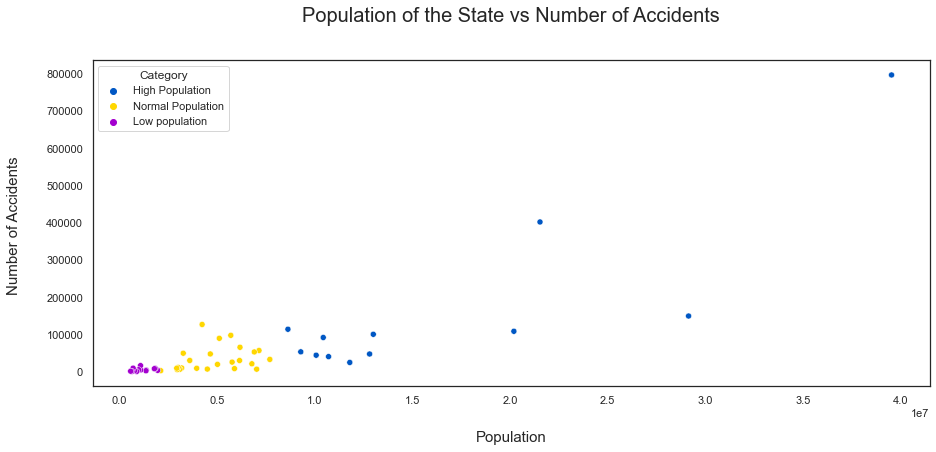

In [40]:
plt.figure(figsize = (15,6))
sb.set_style('white')
sb.scatterplot(data=popplot, x='Population', y='Total Accidents(2016-2021)',hue='Category',palette='prism')
plt.title("Population of the State vs Number of Accidents", y =1.1,fontsize=20)
plt.xlabel('Population',labelpad=25,fontsize=15)
plt.ylabel('Number of Accidents ',labelpad=25,fontsize=15)

- It is evident from the scatterplot that the States with High Population has higher number of accidents
- To quantify this strong linear relationship a correlation heatmap is shown below which shows a correlation coefficient of 0.83. This indicates a strong positive linear relationship of Population and Number of Accidents

<AxesSubplot:>

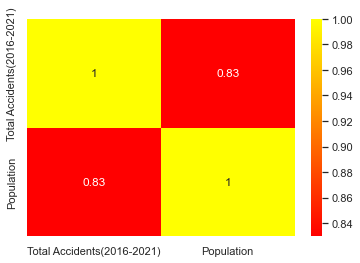

In [41]:
sb.heatmap(popplot.corr(),annot=True,cmap='autumn')

<a id=section53)></a>
## 5.3 TREND OF ACCIDENTS IN DAILY,WEEKLY,MONTHLY AND YEARLY TIME FRAME

In [42]:
df.Start_Time=pd.to_datetime(dataset.Start_Time)
df.Start_Time[0]

Timestamp('2016-02-08 00:37:08')

<a id=section531)></a>
### 5.3.1 Accident Trend  Daily on Weekdays

Text(0, 0.5, 'Percentage of Accidents ')

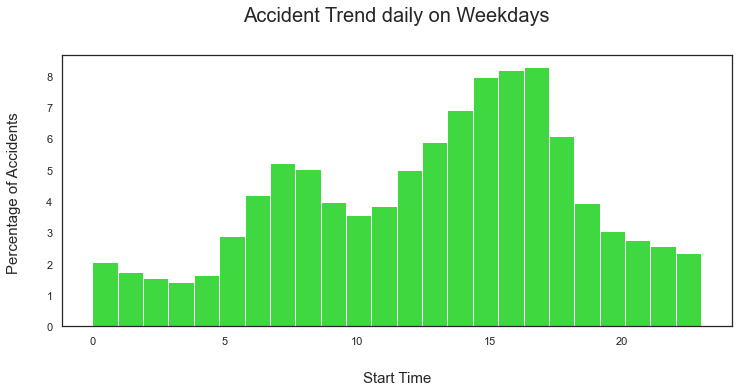

In [43]:
plt.figure(figsize = (12,5))
sb.histplot(df.Start_Time[df.Start_Time.dt.dayofweek<5].dt.hour,bins=24,stat='percent',color='#00CC00')
plt.title("Accident Trend daily on Weekdays", y =1.1,fontsize=20,loc='center')
plt.xlabel('Start Time',labelpad=25,fontsize=15)
plt.ylabel('Percentage of Accidents ',labelpad=25,fontsize=15)

- The daily trend on weekdays exhibits **two peaks** one at 7AM and another 5PM . This can be attributed to the heavy vehicle flow caused by people travelling to work,kid travelling to school etc.. During these hours maximum accidents occur. 
- The peak during afternoon denotes more accidents occur during the evening than morning.

<a id=section532)></a>
### 5.3.2 Accident Trend in Day on hourly basis on Weekends

Text(0, 0.5, 'Percentage of Accidents ')

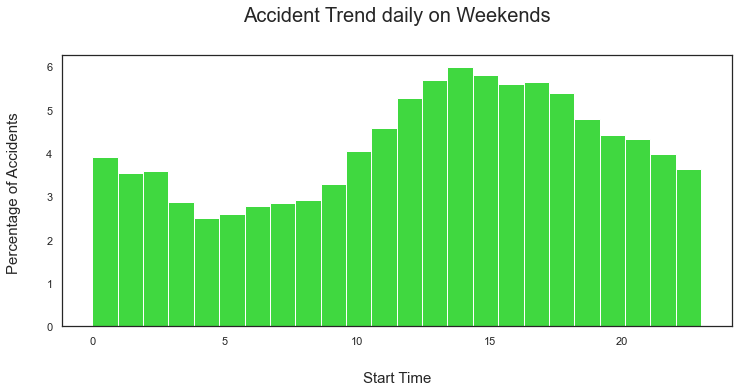

In [44]:

plt.figure(figsize = (12,5))

sb.histplot(df.Start_Time[df.Start_Time.dt.dayofweek>4].dt.hour,bins=24,stat='percent',color='#00CC00')
plt.title("Accident Trend daily on Weekends", y =1.1,fontsize=20,loc='center')
plt.xlabel('Start Time',labelpad=25,fontsize=15)
plt.ylabel('Percentage of Accidents ',labelpad=25,fontsize=15)


- The daily trend on weekends also exhibits two peaks one at 12AM and another 2PM.
- The peak during afternoon denotes more accidents occur during the evening than at 12 at night.

 <a id=section533)></a>
### 5.3.3 Weekly Accident Trend

Text(0, 0.5, 'Percentage of Accidents ')

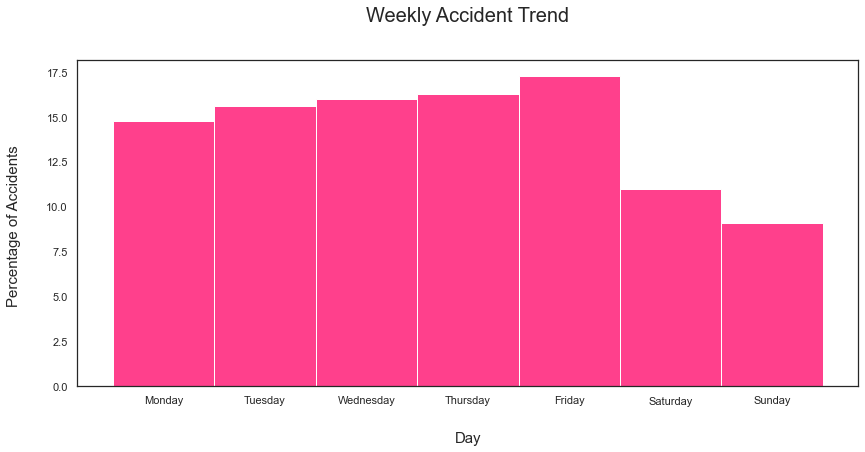

In [45]:

plt.figure(figsize = (14,6))
sb.histplot(df.Start_Time.dt.day_name(),stat='percent',color='#FF0066')
plt.title("Weekly Accident Trend", y =1.1,fontsize=20,loc='center')
plt.xlabel('Day',labelpad=25,fontsize=15)
plt.ylabel('Percentage of Accidents ',labelpad=25,fontsize=15)

- The weekly accident trend shows that Accidents ocur more during the weekdays than weekends.
- Maximum  number of accidents occur on Friday and minimum number of accidents occur on Sunday.

<a id=section534)></a>
### 5.3.4 Monthly Accident Trend

Text(0, 0.5, 'Percentage of Accidents ')

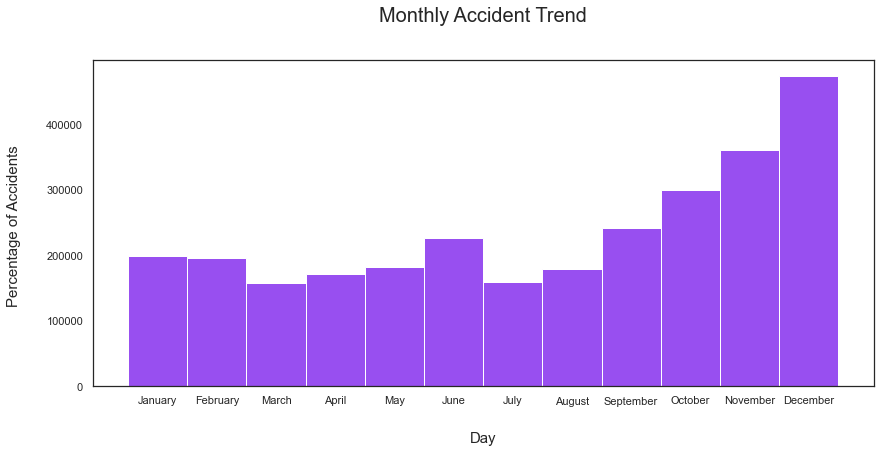

In [46]:

plt.figure(figsize = (14,6))
month=pd.merge(df.Start_Time.dt.month,df.Start_Time.dt.month_name(),right_index = True,left_index = True).\
                                                                            sort_values(by='Start_Time_x',ascending=True)

sb.histplot(month['Start_Time_y'],bins=12,color='#7614EC')
plt.title("Monthly Accident Trend", y =1.1,fontsize=20,loc='center')
plt.xlabel('Day',labelpad=25,fontsize=15)
plt.ylabel('Percentage of Accidents ',labelpad=25,fontsize=15)

- The monthly trend depicts the fact that the number of accidents stay **more or less flat from January to August**.
- The number of accidents continue to **increase from September till December**.
- In the US September to **December** marks **Autumn season and Early Winter** during which the nights are longer and the temperaures 
drop .

<a id=section535)></a>
### 5.3.5 Yearly Accident Trend

Text(0, 0.5, 'Number of Accidents ')

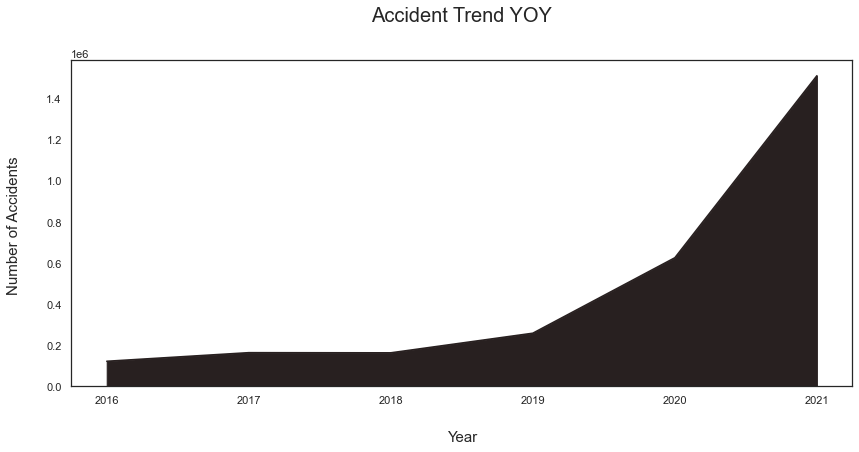

In [47]:

sb.set(style='white')
plt.figure(figsize = (14,6))
df.groupby(df.Start_Time.dt.year)['ID'].count().plot.area(color="#282020")
plt.title("Accident Trend YOY", y =1.1,fontsize=20)
plt.xlabel('Year',labelpad=25,fontsize=15)
plt.ylabel('Number of Accidents ',labelpad=25,fontsize=15)

- The Yearly trend confirms the fact from the article stated above that the **US Accidents has peaked during 2021**.
- There is a sudden spike of accidents post 2019. This may be due to a combination of reasons including cars getting better at 
performance, reckless driving, distraction of cellphones etc.....

<a id=section54)></a>
## 5.4 Distribution of Accidents across US

**Are the accidents ocuring more spread out or it concentrated to few regions?**

In [48]:
#How are the accidents occuring distibuted across US. We can find thid using the Lat and Long data

import folium
from folium.plugins import HeatMap
map=folium.Map(location=[37.98869,-95.47772],zoom_start=4.4,zoom_control=False,scrollWheelZoom=False,dragging=False)

#1% Sample from the dataset

df_sample=df.sample(int(0.01*len(dataset)))
latlon_pairs=zip(list(df_sample.Start_Lat),list(df_sample.Start_Lng))
HeatMap(latlon_pairs).add_to(map)
map

- The Heatmap shows that the accidents are most concentrated in the eastern and western coastal states and this is where th major of the population resides.
- Whereas the central region experiences lesser accidents comparatively.

<a id=section55)></a>
## 5.5 Impact of Weather on Accidents

In [49]:
#Dropping all the rows where Weather is not present which is 2.8% of the total data still we have 97.2%
#Getting all the unique weather types present in the data

weather=df[df["Weather_Condition"].notna()][['Severity','Weather_Condition']]
weather.Weather_Condition.unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Snow', 'Light Snow',
       'Cloudy', 'Scattered Clouds', 'Clear', 'Partly Cloudy',
       'Light Freezing Drizzle', 'Light Drizzle', 'Haze', 'Rain',
       'Heavy Rain', 'Fair', 'Drizzle', 'Fog', 'Thunderstorms and Rain',
       'Patches of Fog', 'Light Thunderstorms and Rain', 'Mist',
       'Rain Showers', 'Light Rain Showers', 'Heavy Drizzle', 'Smoke',
       'Light Freezing Fog', 'Light Freezing Rain', 'Blowing Snow',
       'Heavy Thunderstorms and Rain', 'Heavy Snow', 'Snow Grains',
       'Squalls', 'Light Fog', 'Shallow Fog', 'Thunderstorm',
       'Light Ice Pellets', 'Thunder', 'Thunder in the Vicinity',
       'Fair / Windy', 'Light Rain with Thunder',
       'Heavy Thunderstorms and Snow', 'Light Snow Showers',
       'Cloudy / Windy', 'Ice Pellets', 'N/A Precipitation',
       'Light Thunderstorms and Snow', 'T-Storm', 'Rain / Windy',
       'Wintry Mix', 'Partly Cloudy / Windy', 'Heavy T-Storm', 'Sand',
       'Light Rai

In [50]:
weather.Weather_Condition.unique().size

127

In [51]:
#In which weather conditons do most accidents occur?

weather_id=df[df["Weather_Condition"].notna()][['ID','Weather_Condition']]
weather_accidents_count=weather_id.groupby(["Weather_Condition"]).count().sort_values(by='ID',ascending=False)[:10].reset_index()\
.rename(columns={'ID':'Number of Accidents'})



weather_accidents_count


,Weather_Condition,Number of Accidents
0,Fair,1107194
1,Mostly Cloudy,363959
2,Cloudy,348767
3,Partly Cloudy,249939
4,Clear,173823
5,Light Rain,128403
6,Overcast,84882
7,Scattered Clouds,45132
8,Light Snow,43752
9,Fog,41226


<a id=section551)></a>
### 5.5.1 Top 10 weather condtions which causes most accidents

Text(0, 0.5, 'Weather Conditioning ')

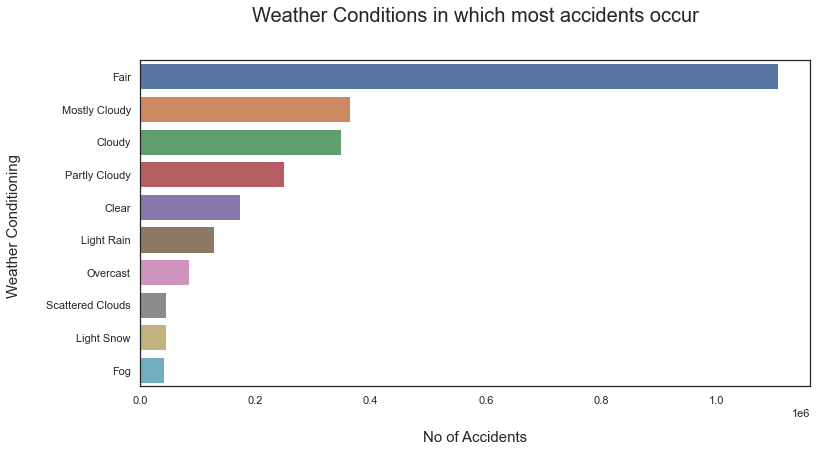

In [52]:


plt.figure(figsize = (12,6))
sb.set(style='white')
pt=sb.barplot(data=weather_accidents_count,x="Number of Accidents",y="Weather_Condition")
pt.set_title("Weather Conditions in which most accidents occur", y =1.1,fontsize=20)
pt.set_xlabel('No of Accidents',labelpad=25,fontsize=15)
pt.set_ylabel('Weather Conditioning ',labelpad=25,fontsize=15)

- Unlike opinions which would say that most number of accidents occcur under extreme conditions,**most number of accidents 
happen in Fair weather conditions.**



<a id=section552)></a>
### 5.5.2 Weather Condtion vs Severity of Accidents

In [53]:
#Top 10 weather condition whih causes accidents of high Severity
weather_severity=weather.groupby(["Weather_Condition"]).mean().sort_values(by='Severity',ascending=False)[:10].reset_index()
weather_severity

,Weather_Condition,Severity
0,Light Blowing Snow,4.000000
1,Light Snow Showers,3.666667
2,Patches of Fog / Windy,3.500000
3,Freezing Rain / Windy,3.000000
4,Thunder and Hail / Windy,3.000000
5,Heavy Snow with Thunder,3.000000
6,Light Fog,3.000000
7,Heavy Blowing Snow,3.000000
8,Funnel Cloud,3.000000
9,Light Haze,3.000000


Text(0, 0.5, 'Weather Conditioning ')

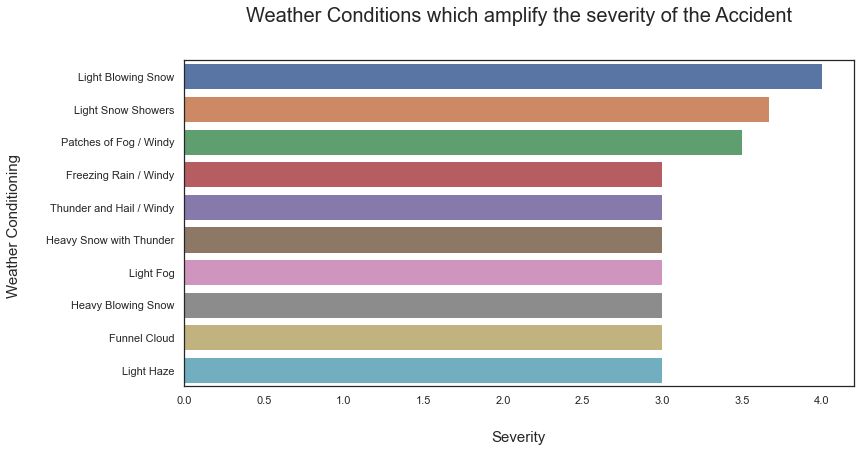

In [54]:
plt.figure(figsize = (12,6))
sb.set(style='white')

pt=sb.barplot(data=weather_severity,x="Severity",y="Weather_Condition")
pt.set_title("Weather Conditions which amplify the severity of the Accident", y =1.1,fontsize=20)
pt.set_xlabel('Severity',labelpad=25,fontsize=15)
pt.set_ylabel('Weather Conditioning ',labelpad=25,fontsize=15)

- The chart depicts that **extreme weather conditions makes the accident more severe**
- Under **Light blowing snow** weather condition he severity average severity of accidents is 4 which is high;y dangerous.
- **Light blowing snow,Light Snow showers and Patcheof Fog/Windy** lead to accidents with more severity(>3)
- Snowy, Cloudy and Foggy weather conditions have severe impact on the passenger during an accident which in a way blocks clear visibility while driving.

<a id=section56)></a>
## 5.6 Trend of Severity of Accidents over the 5 year timeframe

In [55]:
#Taking the Yearwise Accidents and their severity

df_sev=df[['ID','Severity']]
df.Start_Time=pd.to_datetime(df.Start_Time)
df_sev['Year']=df.Start_Time.dt.year
df_sev=df_sev.groupby(['Year','Severity']).count().sort_values(by=['Year','Severity'],ascending=True)
df_sev.rename(columns={'ID':'Number of Accidents'},inplace=True)
df_sev

Number of Accidents
Year Severity                     
2016 2                       86758
     3                       21468
     4                       13798
2017 2                      110365
     3                       30389
     4                       23164
2018 2                      108568
     3                       30173
     4                       24435
2019 2                      204759
     3                       30269
     4                       23587
2020 1                       26053
     2                      534828
     3                       42806
     4                       22177
2021 2                     1487713
     4                       24032

In [56]:
df_year_severity=df_sev.unstack()
df_year_severity=df_year_severity.droplevel(axis=1,level=0)

Text(0, 0.5, 'Number of Accidents ')

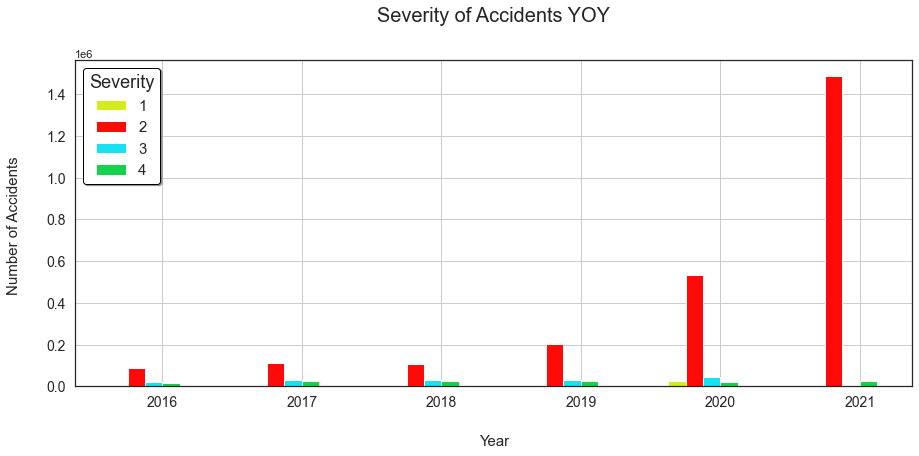

In [57]:
df_year_severity.plot(kind='bar',color=['#D3EC1C','#FF0909','#16E2F2','#13D34A'],figsize=(15,6),grid=True,position=0.75,fontsize=14)
plt.legend(fontsize=15,title='Severity',title_fontsize=18, edgecolor='black',shadow=True)
plt.xticks(rotation=0)
plt.title("Severity of Accidents YOY", y =1.1,fontsize=20)
plt.xlabel('Year',labelpad=25,fontsize=15)
plt.ylabel('Number of Accidents ',labelpad=25,fontsize=15)

In [58]:
cagr=pd.DataFrame(df_year_severity.loc[[2016,2021]][2])
CAGR=round(((cagr.loc[2021]/cagr.loc[2016])**(1/5)-1)*100,2)
print(CAGR)

2    76.54
dtype: float64


**Correlation between different fields in data**

- Correlation helps in identifying linear relationships between the variables and determine whether they are positively correlated,negatively correlated or dont have any correlation between them.


<AxesSubplot:>

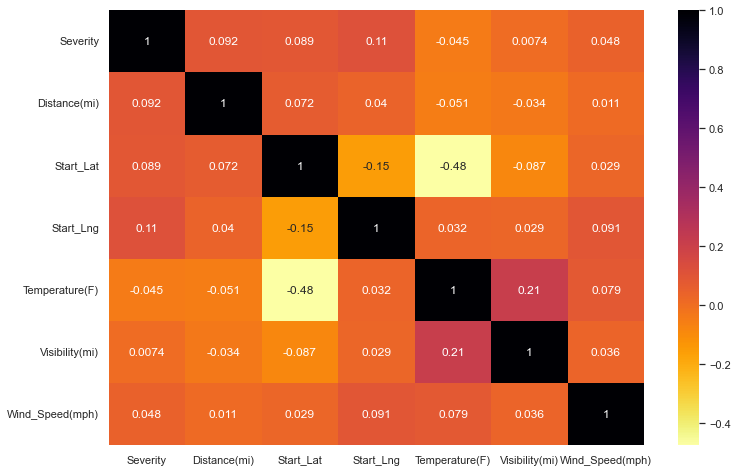

In [59]:
plt.figure(figsize=(12,8))
m=dataset[['Severity','Distance(mi)','Start_Lat','Start_Lng','Temperature(F)','Visibility(mi)','Wind_Speed(mph)','Wind_Direction','Weather_Condition']]
sb.heatmap(m.corr(),annot=True,cmap='inferno_r')

- The columns of interest does not have any strong correlation between them. Hence we cannot infer anything out of the heatmap.

<a id=section6)></a>
## 6. Summary

**The data analysed can be summarised as below**
<br><br>
1. **City**

    - The cities which encountered most number of accidents were **Miami, Los Angeles,Orlando.**
    - These three cities together contributed to **8.1% of the total accidents.**
    - Most of cities had experienced less than 10000 accidents from 2016 to 2021.
    - **New York** being the largst bcity by population stood **51st in terms of number of accidents**.
    - **High Accident Cities** which was **7%** of the total number of cities were amounting to a whopping **66.8% of the total accidents.**
    - **Low Accident Cities** which was **93%** of the total number of cities were amounting to a mere **33.2% of the total accident.**
<br><br>

2. **State**

    - The states which faced most number of accidents were **Miami,Florida and Texas.**
    - These three states cumulativly accounted for a staggering **47.32%** of the accidents.
    - **South Dakota** had the **least number of accidents(201 accidents).**
    - Population of the states had a **strong positive correlation** with the number of accidents.
    - **California** being the highest populated state **(39.53 million)** had encountered the most number of accidents.
<br><br>  

3. **Accident Trend-Time Series**
    
    - During weekdays most number of accidents peak out during **morning(6AM-9AM) and evening(3PM-6PM)** time.
    - During weekends most number of accidents peak out during **evening(1PM-6PM) and night(11PM-2AM)** time.
    - **Weekdays** experience **more** number of accidents when compared to Weekends.
    - **Fridays** face the **most** number of accidents and **Sundays** the **least**.
    - On a monthly time frame the number of accidents per month stay **flat during January to August**, but the trend **rises from September to December** rapidly.
    - On a yearly timeframe accidents have been rising YOY and was the highest in 2021 with 1.51 million accidents.
<br><br>

4. **Distrbution across US**
    - The accidents occur in large number in the eastern and western region and less **concentrated in the central region.**
<br><br>

5. **Weather and Severity**
    
- Most number of accidents **(1.1 million)** occur during **Fair weather condition** unlike the assumptions and opinions which float around explaining that most accidents occur under harsh condition.
- **Top 3** weather conditions which causes **most number of accidents** are:-

|<center>Weather Conditon                     |Number of Accidents(in millions)                            |
  |-------------------------------------|:----------------------------------:|
  |<center>Fair|<center>1.1</center>|
  | <center>Mostly Cloudy|<center>0.36</center>|
  |<center>Cloudy|<center>0.34</center>|




- The harsh weather conditions increase the severity of the acccident. Under **Light Blowing Snow** conditions the severity  peaks out to a scale of **4.**
- **Top 3** weather conditions which causes **severe accidents** are:-
|Weather Conditon                     |Severity                            |
|-------------------------------------|:----------------------------------:|
|Light Blowing Snow|	4|
| Light Snow Showers|	3.6|
 |Patches of Fog Windy|	3.5|


- The accidents of the **severity of scale 2** has risen drastically from 2016 to 2021. Accidents of these type has been rising at a CAGR of **76.54%** but the accidents of other severities have almost remained flat.


<a id=section7)></a>
## 7. Actionable Insights

- Accidents occur due to variety of reasons like vehicles getting better at performance, reckless driving, distraction of cellphones, poor roads, bad weather conditions, street racing etcc... Although its a behavioural aspect accidents can be brought under control by undertaking some measures.<br>
<br><br>    
    1. **Cities and States facing higher accidents** should be **monitored closely and strict Traffic rules** can be implemented.<br><br>   
    
    2. Cities and States which encountered higher accidents should employ additional task force to regulate driving activity.<br><br>   
    
    3. Accidents happen **more during weekdays**(most on Fridays) and the peak happens during **morning and evening hours** during which additional traffic control force can employed for monitoring vehicle activity. <br><br>   
    
    4. Video monitoring system can be implemented to track abnormal vehicle activity,traffic congestion etc. It can be also installed in high accident zones for close monitoring.<br><br>   


<a id=section8)></a>
## 8. Future Scope

- The study  can be further extended in the angle of understanding the description of the accidents given in the dataset 
and relating it to other variables. This will enable us to understand reasons behind accidents in specific regions of specific
city of the specific state.<br><br>

- The address data can be related to the description to find patterns in the accidents occuring at specific areas.<br><br>

- Additional data related to accidents can be mapped with this data to get more insights on the reason behind the increase. It can be survey data of people resiging at specific cities and states.